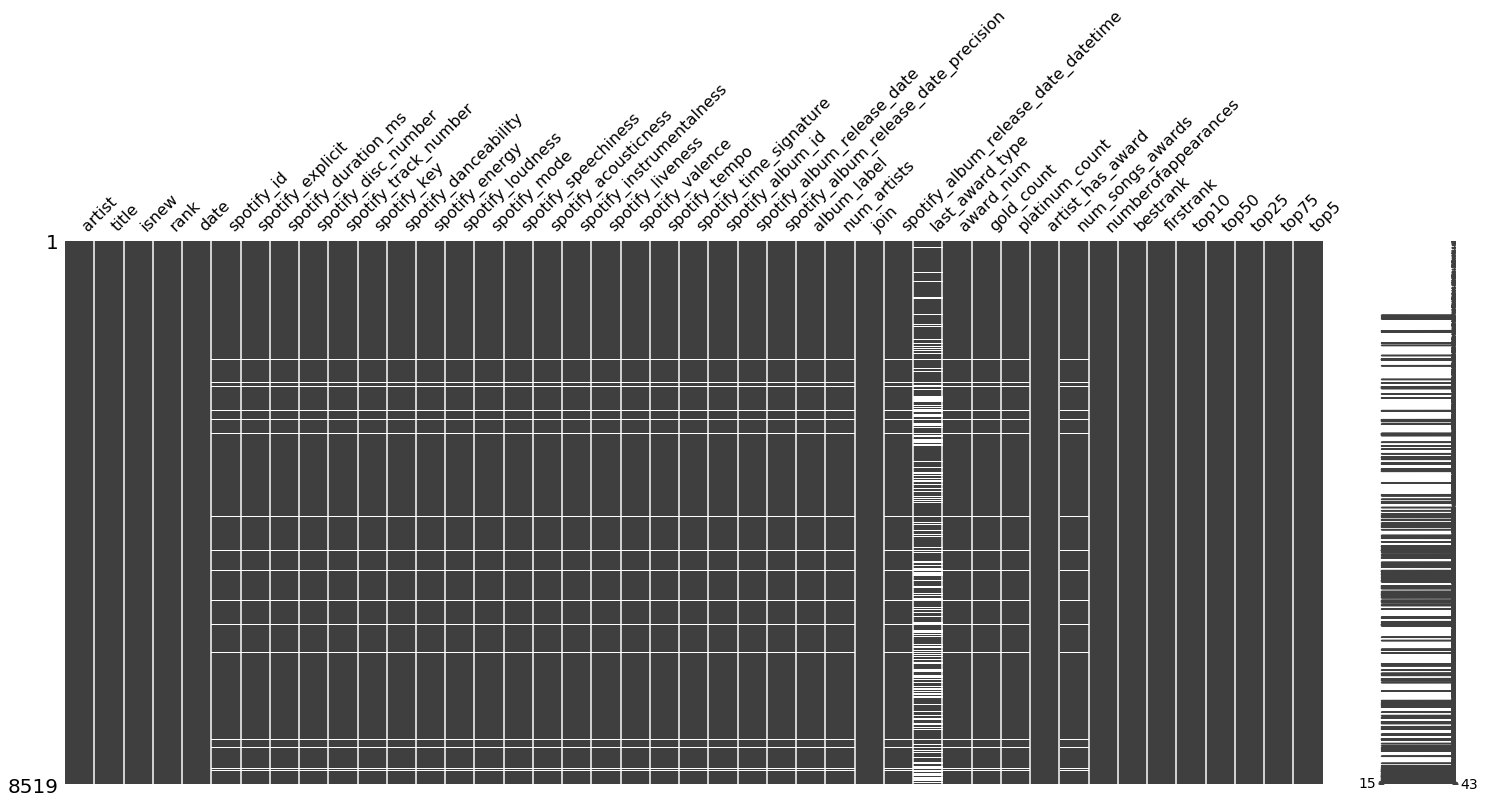

In [16]:
import pandas as pd
import numpy as np
import pickle 
from datetime import datetime
import missingno as msno
import matplotlib.pyplot as plt
import joypy
import seaborn as sns

%matplotlib inline

with open('riaa_df.pkl', 'rb') as f:
        riaa_df = pickle.load(f)
with open('song_df_aggregate.pkl', 'rb') as f:
        song_df = pickle.load(f)
msno.matrix(song_df)

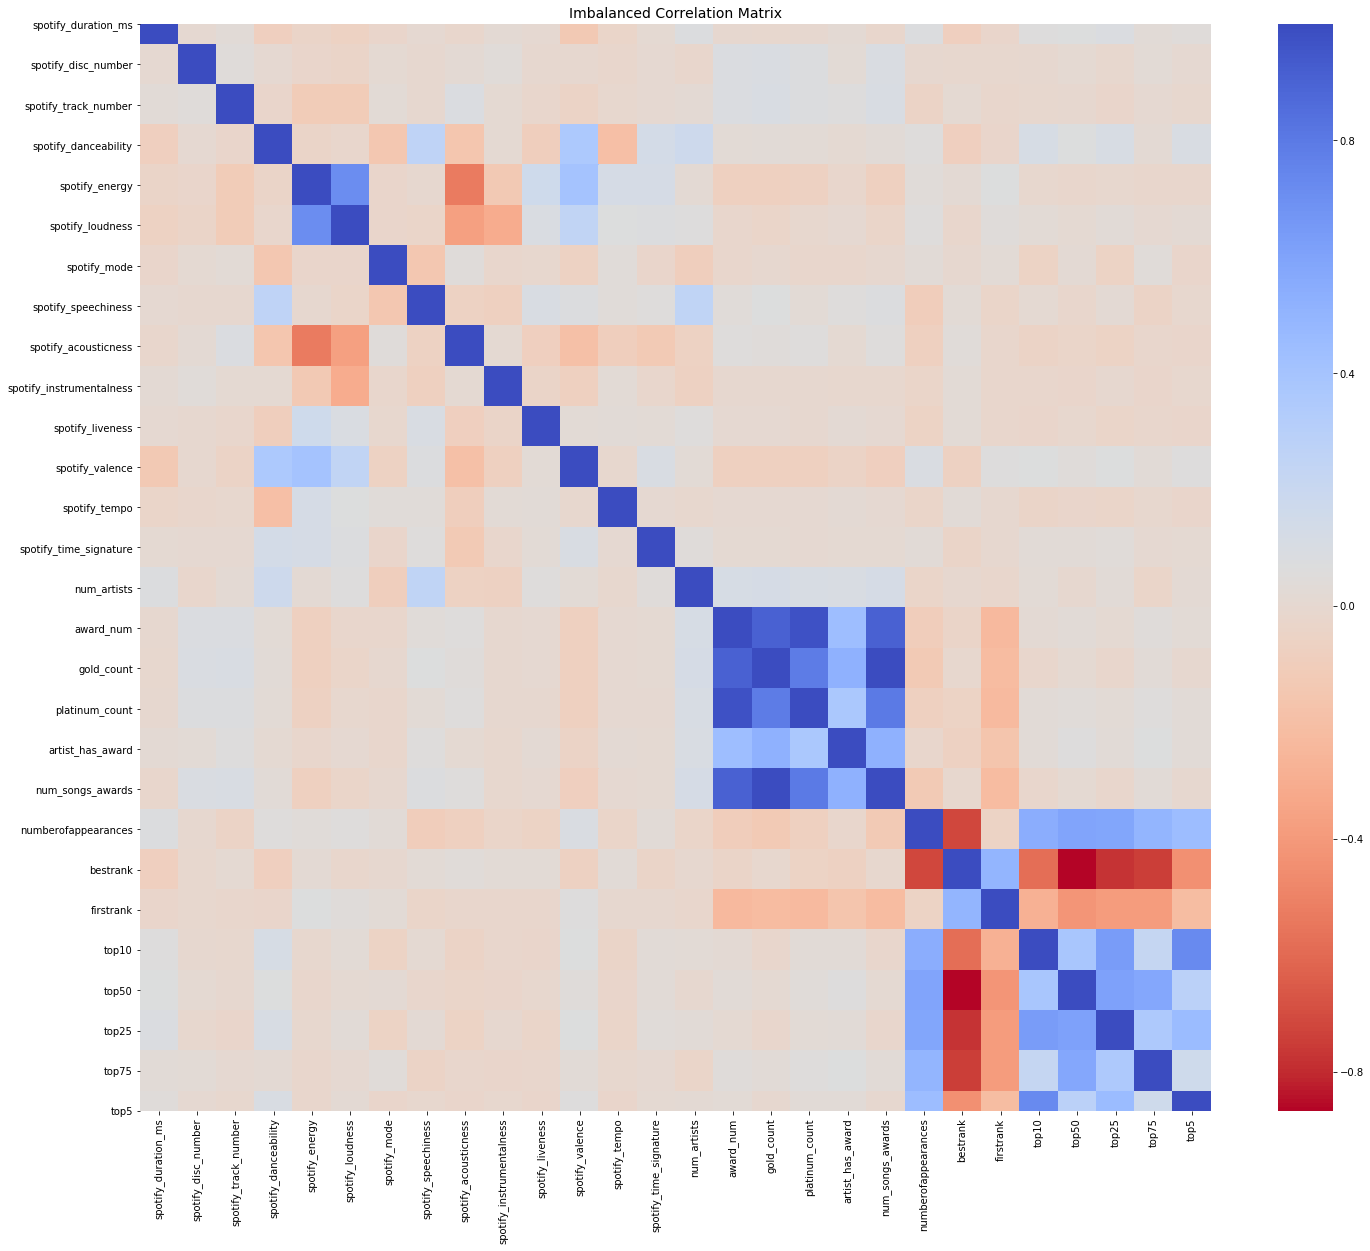

In [14]:
f,ax1 = plt.subplots(1, 1, figsize=(24,20))

# Entire DataFrame
corr = song_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

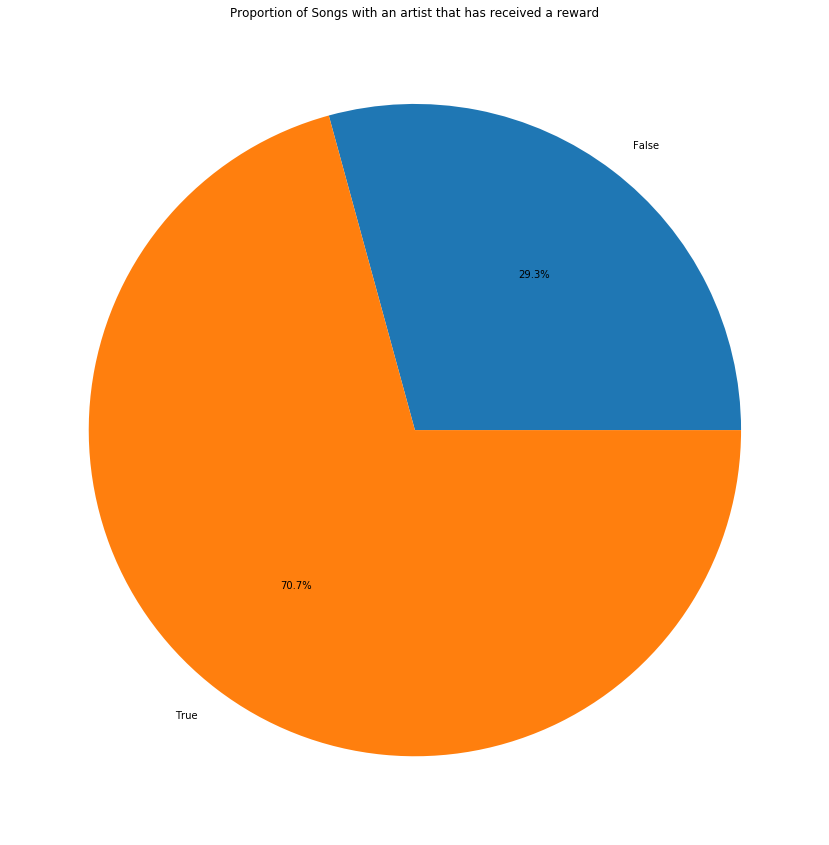

In [18]:
plt.figure(figsize=(15,15))
plt.pie(song_df.groupby("artist_has_award").count()["artist"],autopct ="%1.1f%%",labels=song_df.groupby("artist_has_award").count()["artist"].index)
plt.title("Proportion of Songs with an artist that has received a reward")
plt.show()

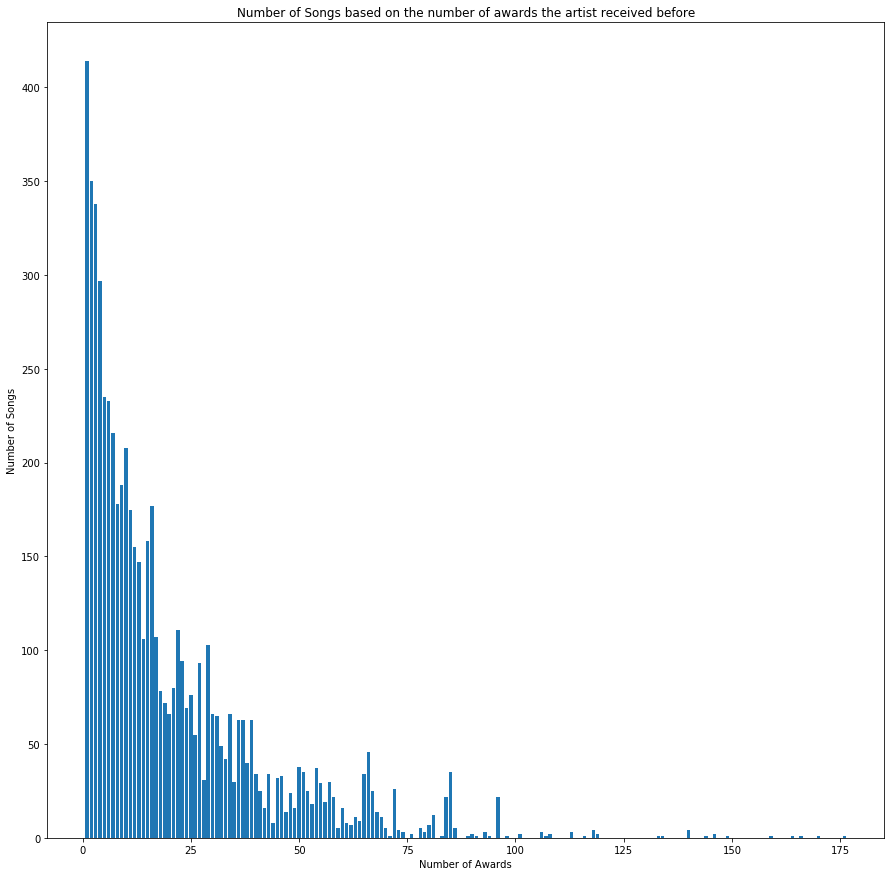

In [22]:
award_num = song_df[song_df["artist_has_award"] ==1].groupby("award_num").count()["artist"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Number of Songs based on the number of awards the artist received before")
plt.ylabel("Number of Songs")
plt.xlabel("Number of Awards")
plt.show()

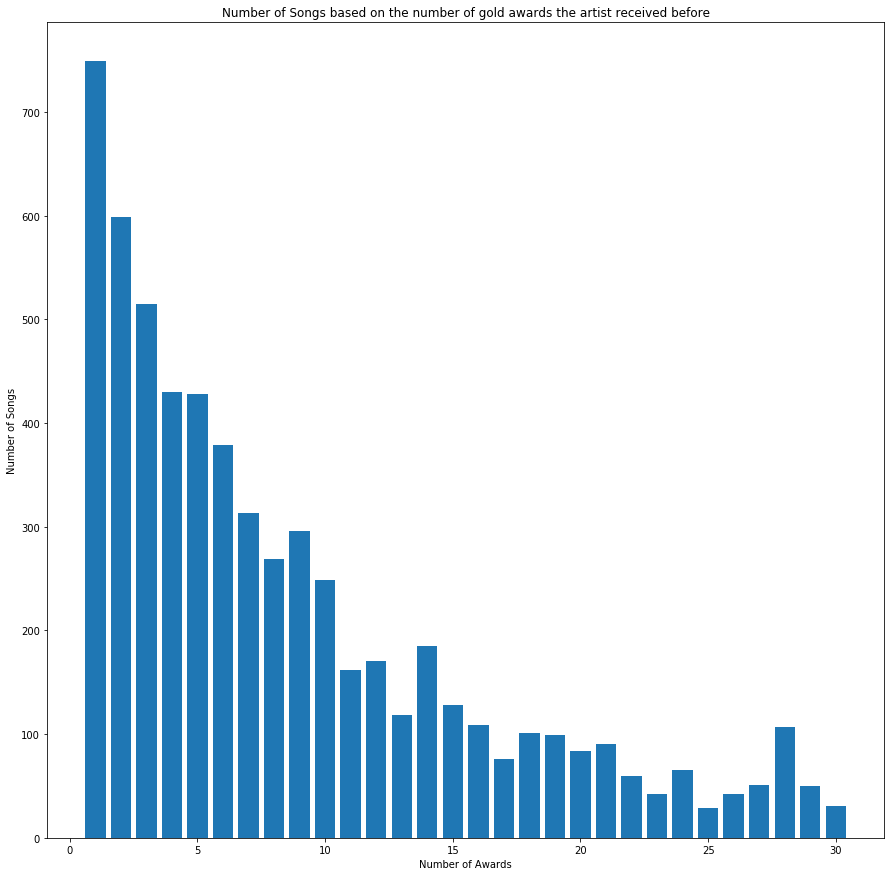

In [23]:
award_num = song_df[song_df["artist_has_award"] ==1].groupby("gold_count").count()["artist"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Number of Songs based on the number of gold awards the artist received before")
plt.ylabel("Number of Songs")
plt.xlabel("Number of Awards")
plt.show()

In [ ]:
song_df["artist_has_award"] = song_df["award_num"] > 0
award_num = song_df[song_df["artist_has_award"] ==1].groupby("platinum_count").count()["artist"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Number of Songs based on the number of platinum awards the artist received before")
plt.ylabel("Number of Songs")
plt.xlabel("Number of Awards")
plt.show()

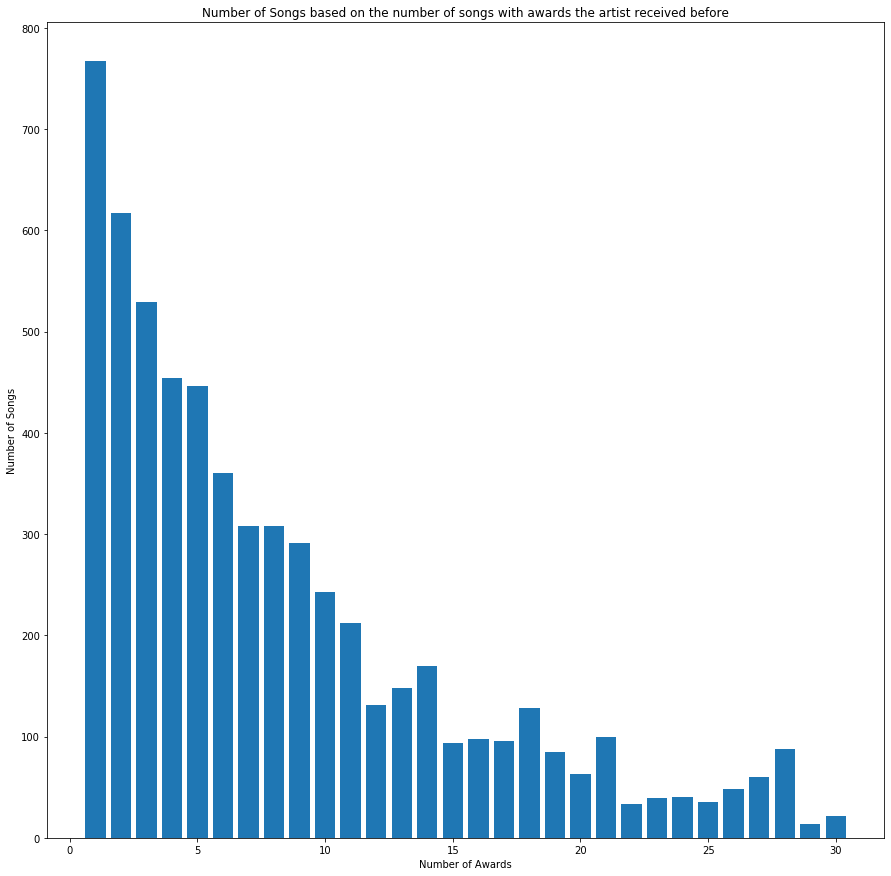

In [27]:
song_df["artist_has_award"] = song_df["award_num"] > 0
award_num = song_df[song_df["artist_has_award"] ==1].groupby("num_songs_awards").count()["artist"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Number of Songs based on the number of songs with awards the artist received before")
plt.ylabel("Number of Songs")
plt.xlabel("Number of Awards")
plt.show()

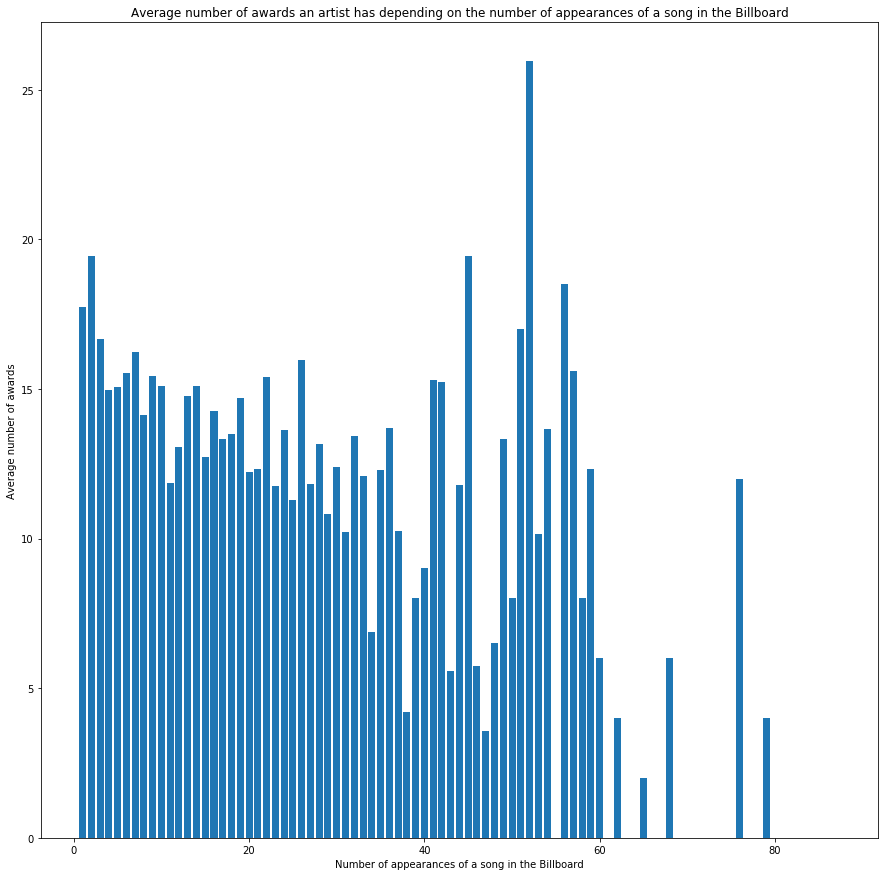

In [31]:
award_num = song_df.groupby("numberofappearances").mean()["award_num"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Average number of awards an artist has depending on the number of appearances of a song in the Billboard")
plt.ylabel("Average number of awards")
plt.xlabel("Number of appearances of a song in the Billboard")
plt.show()

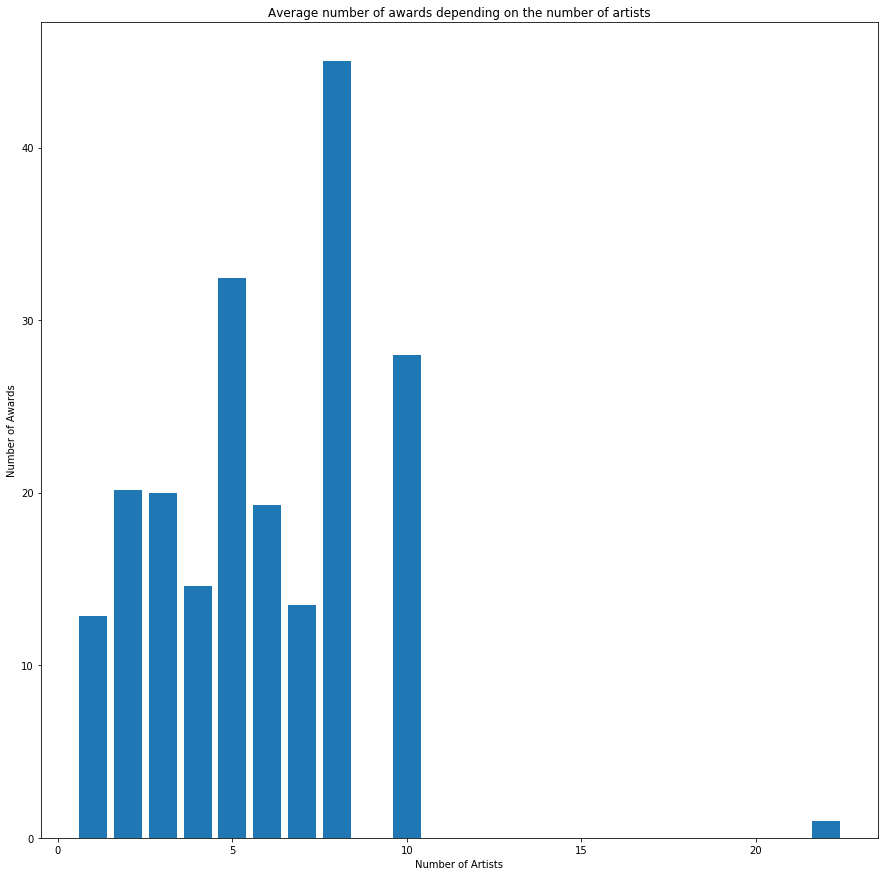

In [32]:
award_num = song_df.groupby("num_artists").mean()["award_num"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Average number of awards depending on the number of artists")
plt.ylabel("Number of Awards")
plt.xlabel("Number of Artists")
plt.show()

In [39]:
labels_occurence = list()
for i in np.asarray(song_df["album_label"]):
    if type(i) == str:
        label = i.split("/")
        for lab in label: 
            labels_occurence.append(lab.strip())

In [21]:
import umap

umap_df = song_df
embedding = umap.UMAP().fit_transform(umap_df.values)

fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(
    embedding[:, 0], embedding[:, 1], cmap="Spectral", s=0.1)
plt.setp(ax, xticks=[], yticks=[])
plt.title("Data embedded into two dimensions by UMAP", fontsize=18)

ValueError: could not convert string to float: 'Lewis Capaldi'